# 904 决策树的学习曲线和复杂度曲线

## 决策树的学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 基于RMSE绘制学习曲线

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)],
                                np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train)+1)],
                                np.sqrt(test_score), label='test')
    plt.legend()

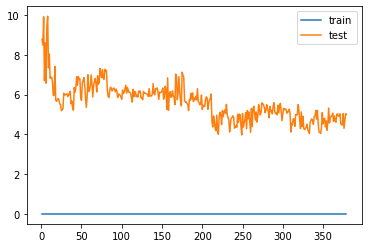

In [5]:
plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

### 基于R^2值绘制学习曲线

In [6]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score=[]
    test_score=[]
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i],y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)],
                                 train_score, label='train')
    plt.plot([i for i in range(1, len(X_train)+1)],
                                test_score, label='test')
    plt.legend()

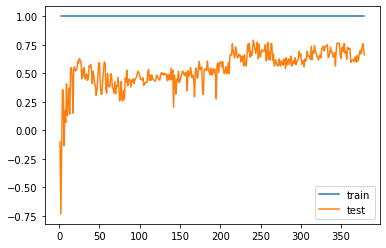

In [7]:
plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

### 以max_depth参数为例，看不同参数学习曲线的不同

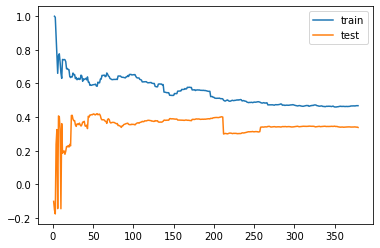

In [8]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=1), X_train, X_test, y_train, y_test)

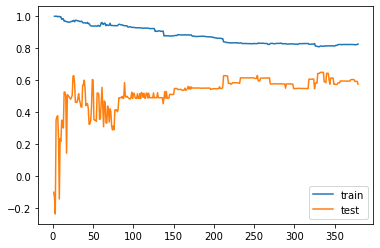

In [9]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

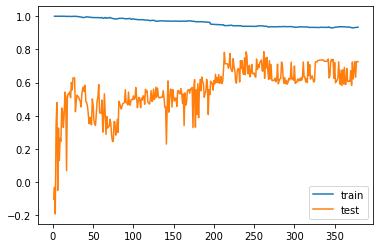

In [10]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

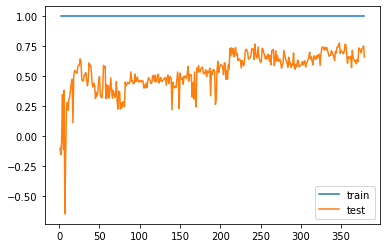

In [11]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=20), X_train, X_test, y_train, y_test)

## 绘制模型复杂度曲线

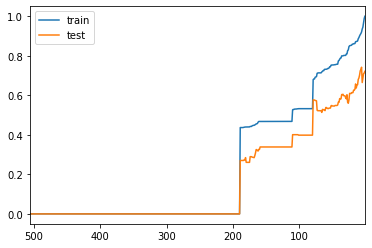

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

maxSampleLeaf = 506
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(506, 1)
plt.legend()

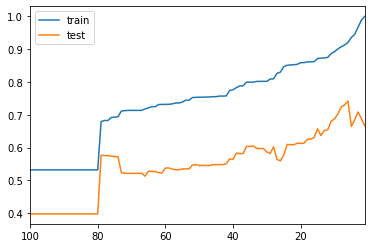

In [13]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(maxSampleLeaf, 1)
plt.legend()

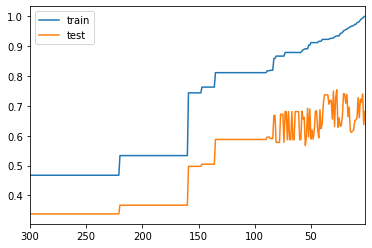

In [14]:
maxSamplesSplit = 300
train_scores = []
test_scores = []
for i in range(2, maxSamplesSplit+1):
    dt_reg = DecisionTreeRegressor(min_samples_split=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(2, maxSamplesSplit+1)], train_scores, label="train")
plt.plot([i for i in range(2, maxSamplesSplit+1)], test_scores, label="test")
plt.xlim(maxSamplesSplit, 2)
plt.legend()